In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
import itertools

import numpy as np
from scipy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

from gmm_lbd.gmm import LbdGMM
from gmm_lbd.data_manager import GmmManager, plot_2D_mean_covars
from gmm_lbd.operations import conc, seq, influence_gmm

%matplotlib inline


### We load a dataset of ~150 samples / 5 components (4 motors + time) registered 3 times by demonstration with a right arm of a poppy-torso

In [2]:
manager2 = GmmManager(n_components_range=range(2, 5))
manager2.add_move('records/l_arm_2.record')
manager2.add_move('records/l_arm_3.record')
manager2.add_move('records/l_arm_4.record')
print manager2.datasets['r_arm_z'].shape, manager2.datasets.keys()


(462, 2) [u'r_arm_z', u'r_elbow_y', u'r_shoulder_x', u'r_shoulder_y']


We generate GMM of motors position referenced with the sample number

[(<matplotlib.axes._subplots.AxesSubplot at 0x7fa13b22f7d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fa13b004d90>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fa13b003790>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fa13ae1bbd0>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fa13adb2e10>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fa13ac2e8d0>)]

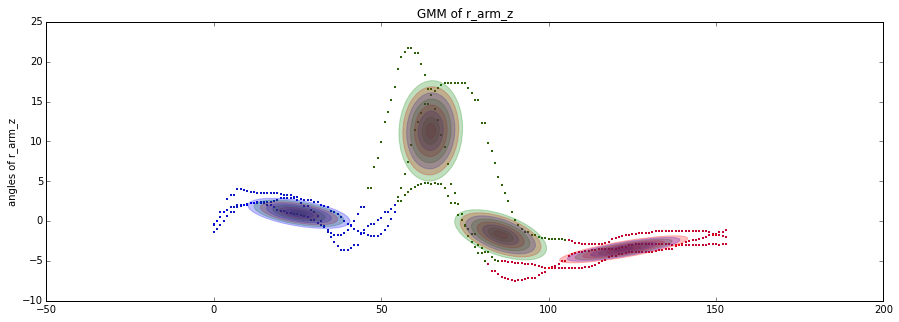

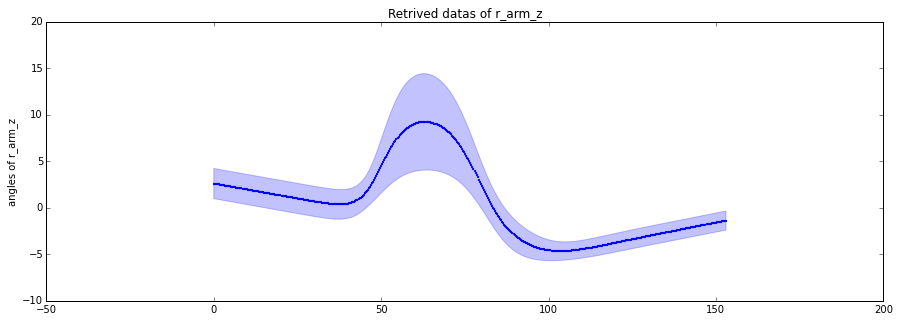

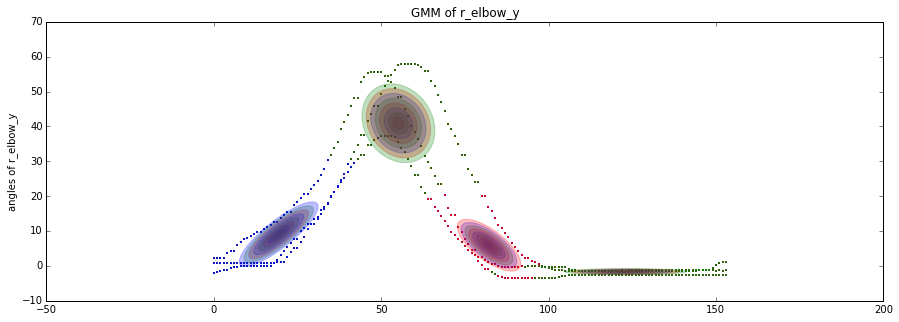

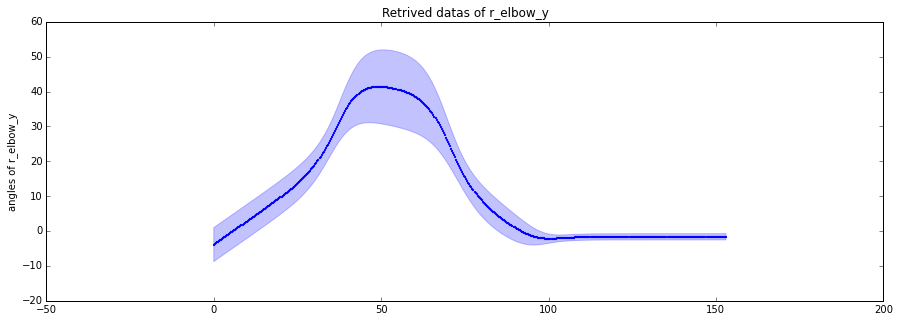

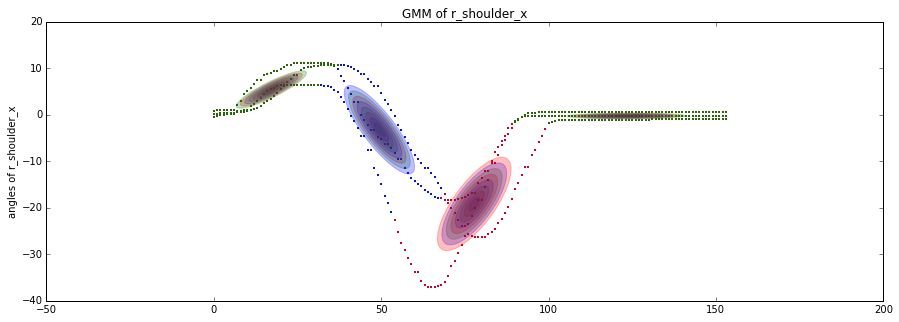

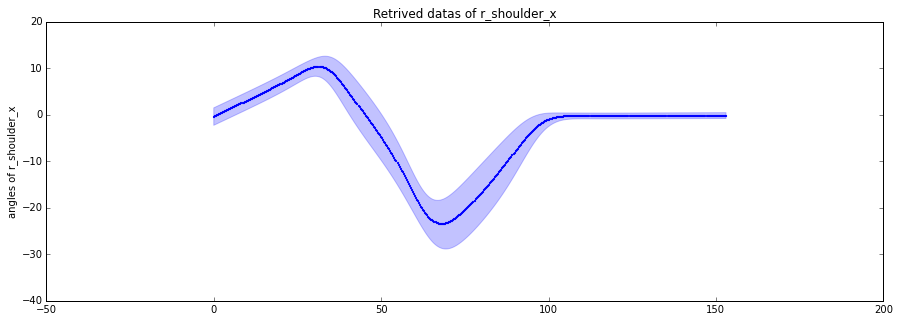

In [3]:
[(manager2.plot_ellipses_and_samples(key), manager2.plot_regression(key)) for key in manager2.datasets.keys()[:-1]]

## The same thing with another dataset:
These movements are too complex and far from each other to be welld represented by the GMM...

In [4]:
manager = GmmManager( n_components_range=range(2, 5))
manager.add_move('records/l_a_1.record')
manager.add_move('records/l_a_3.record')
manager.add_move('records/l_a_4.record')

print manager.datasets['r_arm_z'].shape, manager.datasets.keys()


(459, 2) [u'r_arm_z', u'r_elbow_y', u'r_shoulder_x', u'r_shoulder_y']


[(<matplotlib.axes._subplots.AxesSubplot at 0x7fa16948ce10>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fa13a6f1210>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fa13a68b450>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fa13a504a90>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fa13a493a90>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fa13a319e50>)]

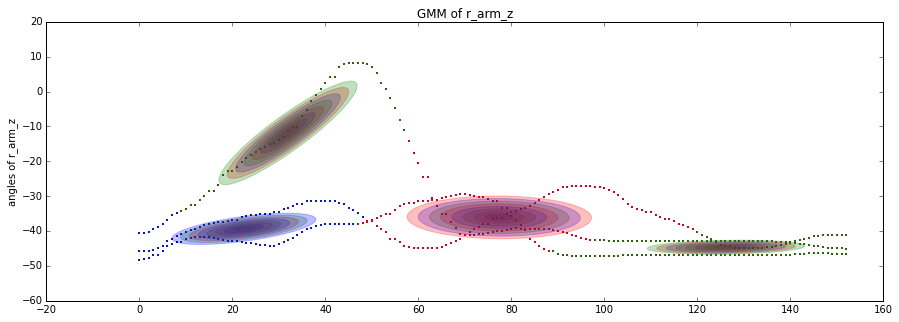

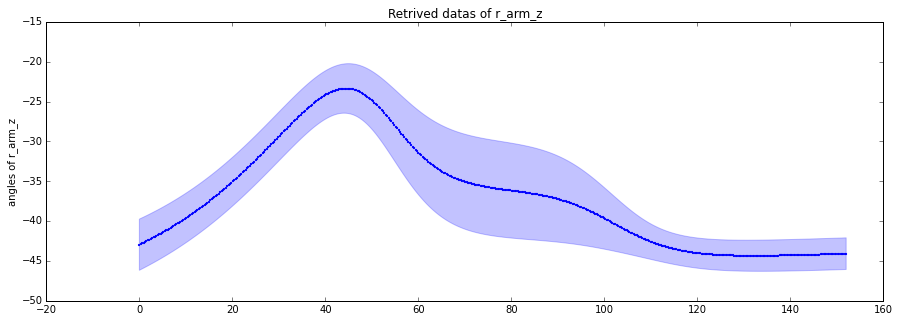

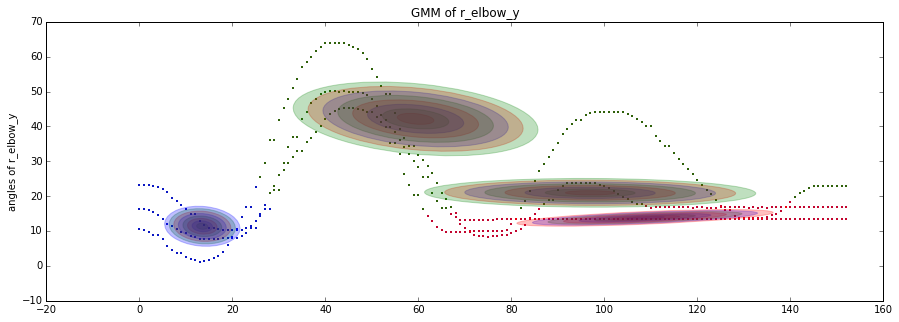

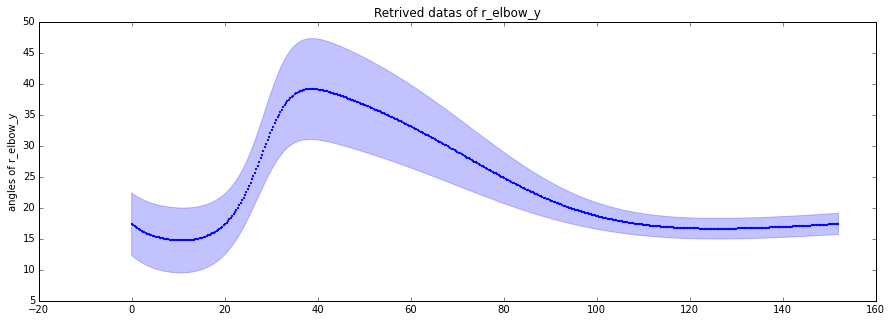

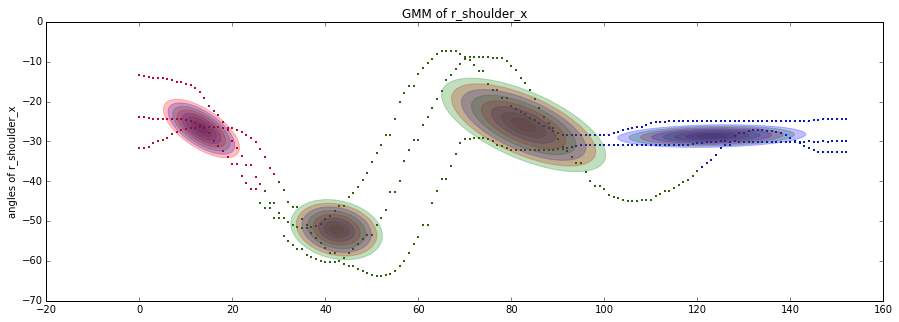

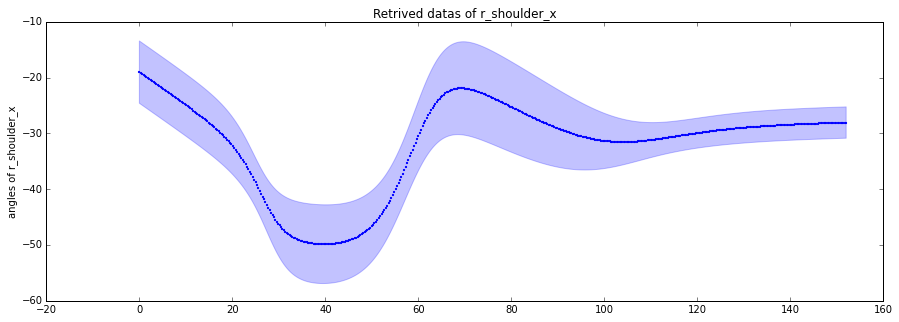

In [5]:
[(manager.plot_ellipses_and_samples(key), manager.plot_regression(key)) for key in manager.datasets.keys()[:-1]]

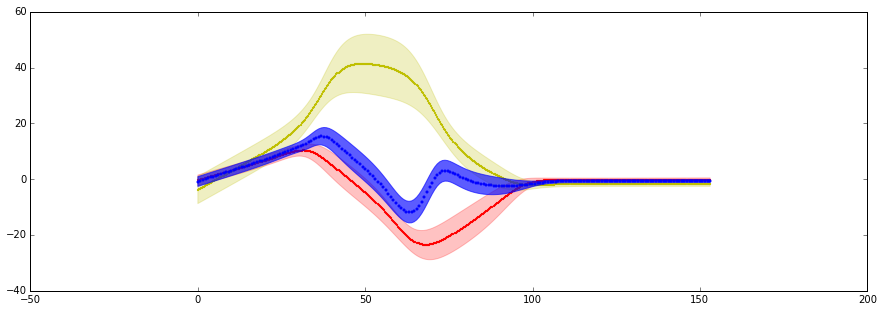

In [28]:
#gmm1 = manager.gmms['r_shoulder_x']
gmm2 = manager2.gmms['r_shoulder_x']
#gmm3 = manager2.gmms['r_arm_z']
gmm4 = manager2.gmms['r_elbow_y']

ax = plot_2D_mean_covars(gmm2.regression(), color='r')

plot_2D_mean_covars(gmm4.regression(), ax=ax, color='y')
plot_2D_mean_covars(conc(gmm2, gmm4),ax=ax, size=0.8)
#plot_2D_mean_covars(seq(gmm1, gmm2, ver='align').regression(),ax=ax, size=0.5, color='g')




In [7]:
x, means, _ = prod(gmm1, gmm2)
data= np.vstack((x,means[:,0])).T
manager.add_dataset(data,'42')
manager.plot_ellipses_and_samples(dataset_name='42')
plot_2D_mean_covars(manager.gmms['42'].regression())

NameError: name 'prod' is not defined

In [ ]:
data= np.hstack((x,means[:,0]))


In [ ]:
gmm4 = prod(gmm2,gmm3)
ax = gmm4.plot_ellipses()
plot_2D_mean_covars(gmm4.regression())
